In [17]:
import numpy as np
np.random.uniform(0,1)

0.8875752792919622

1. Target Distribution
$$
f(x)=30\,x^2\,(1-x)^2,\quad x\in[0,1],\quad \text{or else}f(x)=0.
$$

This is $Beta(3,3)$ distribution，but here we don't use $Beta$ to generate，instead, we use the rejection method.

2. choice of g(x)
Let g(x)=1 （i.e. $Uniform(0,1)$）on the interval [0,1]。So in each iteration，it's easy to draw samples of Y from $Uniform(0,1)$.

4. Search for constant $c$
We need to find $c>0$，s.t.
$$
\frac{f(x)}{\,g(x)\,}\;\le\; c,\quad \forall x\in[0,1].
$$
As g(x)=1，so we only need to $c \;\ge\; \max_{0\le x\le 1} f(x).$ and calculate the max of f：
Let $f(x)=30 x^2 (1-x)^2$，during [0,1], the max point shows at $x=0.5$，

$$
f(0.5) \;=\; 30\cdot\Bigl(\tfrac12\Bigr)^2\cdot\Bigl(\tfrac12\Bigr)^2
\;=\; 30 \times \tfrac14 \times \tfrac14
\;=\; 30 \times \frac{1}{16}
\;=\; 1.875.
$$
* Consequently, we can set c=1.875。

5. The rejection algorithm 
* Step 1: generate $Y\sim \text{Uniform}(0,1)$。
* Step 2: generate $U\sim \text{Uniform}(0,1)$。
* Step 3: If $U \;\le\; \frac{f(Y)}{\,c\,g(Y)\,} \;=\;\frac{f(Y)}{\,c\times 1\,} \;=\;\frac{f(Y)}{\,c\,},$

then let X=Y；or else return to Step 1。


Generated 1000000 samples by Rejection Sampling.
Acceptance rate = 0.533 (theoretical ~ 1/1.875=0.533)


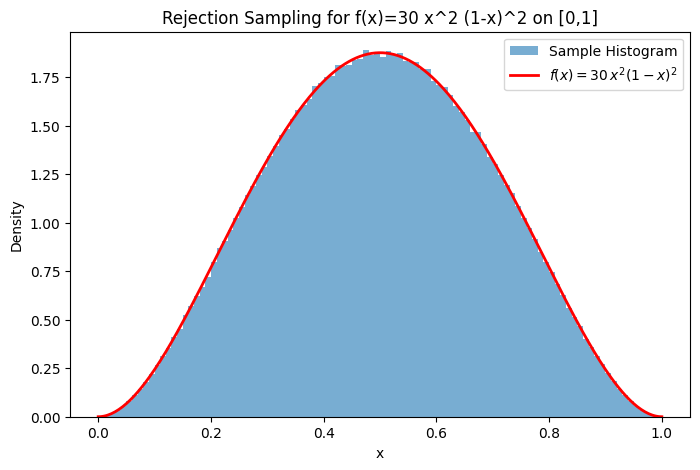

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """目标密度 f(x) = 30 x^2 (1-x)^2, 0<=x<=1"""
    return 30 * (x**2) * ((1 - x)**2)

def rejection_sampling_f(n_samples=10_000_00):
    """
    用拒绝采样从 f(x) 生成 n_samples 个样本
    提议分布 g(x)=Uniform(0,1)， c = 1.875
    """
    c = 1.875
    samples = []
    
    count = 0
    while len(samples) < n_samples:
        # Step 1: Y ~ Uniform(0,1)
        y = np.random.uniform(0,1)
        # Step 2: U ~ Uniform(0,1)
        u = np.random.uniform(0,1)
        
        # Step 3: 检验 U <= f(Y)/[c*g(Y)] = f(Y)/c
        if u <= f(y)/c:
            samples.append(y)
        
        count += 1
    
    samples = np.array(samples)
    acceptance_rate = n_samples / count
    return samples, acceptance_rate

def main():
    # 1) 用拒绝采样生成 1,000,000 个随机数
    N = 1_000_000
    samples, acc_rate = rejection_sampling_f(N)
    print(f"Generated {N} samples by Rejection Sampling.")
    print(f"Acceptance rate = {acc_rate:.3f} (theoretical ~ 1/1.875=0.533)")

    # 2) 画出直方图与理论曲线
    plt.figure(figsize=(8,5))

    # 直方图 (归一化)
    plt.hist(samples, bins=100, range=(0,1), density=True, alpha=0.6, label="Sample Histogram")

    # 理论密度
    x_plot = np.linspace(0,1,300)
    y_plot = f(x_plot)
    plt.plot(x_plot, y_plot, 'r-', lw=2, label=r"$f(x)=30\,x^2(1-x)^2$")

    plt.title("Rejection Sampling for f(x)=30 x^2 (1-x)^2 on [0,1]")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()